In [1418]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
import seaborn as sns
import math

### Read data

In [1419]:
df = pd.read_parquet('dataZNO.parquet')
data = pd.DataFrame(df) 
data

,Birth,SexType,SchoolType,SchoolRegion,SchoolArea,Ukr,Hist,Math,Phys,Chem,Bio,Eng,Fra,Deu,Spa,TestType,Urban
0,2002,0,середня загальноосвітня школа,Рівненська область,Сарненський район,"165,0","109,0","124,0",None,None,None,None,None,None,None,ZNO2020,0.0
1,2003,1,середня загальноосвітня школа,Сумська область,м.Суми. Зарічний район міста,"159,0","139,0","145,0",None,None,None,"146,0",None,None,None,ZNO2020,1.0
2,2002,1,середня загальноосвітня школа,Дніпропетровська область,м.Павлоград,"0,0","113,0","0,0",None,None,None,None,None,None,None,ZNO2020,1.0
3,2003,1,середня загальноосвітня школа,Волинська область,Любешівський район,"162,0","132,0","145,0",None,None,None,None,None,None,None,ZNO2020,0.0
4,2002,0,гімназія,м.Київ,м.Київ. Дарницький район міста,"192,0","162,0","192,0",None,None,None,None,None,None,None,ZNO2020,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780646,2006,1,середня загальноосвітня школа,Донецька область,Волноваський район,"174,0","155,0","148,0",None,None,None,None,None,None,None,NMT2023,0.0
780647,2004,1,None,None,None,"142,0","130,0","131,0",None,None,None,None,None,None,None,NMT2023,NaN
780648,2006,0,середня загальноосвітня школа,Львівська область,м.Львів,"174,0",None,"187,0",None,None,None,"171,0",None,None,None,NMT2023,1.0
780649,2004,1,заклад професійної (професійно-технічної) освіти,Харківська область,Лозівський район,"128,0","134,0","134,0",None,None,None,None,None,None,None,NMT2023,1.0


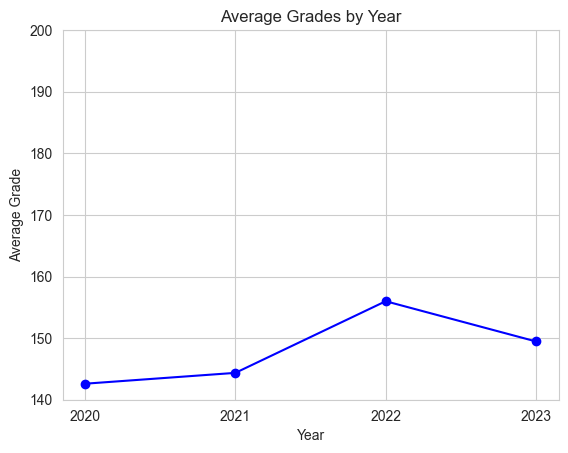

In [1420]:
years = ['2020', '2021', '2022', '2023']
grades = [142.60, 144.36, 155.99, 149.46]
fig, ax = plt.subplots()
ax.plot(years, grades, marker='o', linestyle='-', color='b')
ax.set_xlabel('Year')
ax.set_ylabel('Average Grade')
ax.set_ylim(140, 200)
ax.set_title('Average Grades by Year')
ax.grid(True)
plt.show()

### Distributions of Ukr grades

### 2020

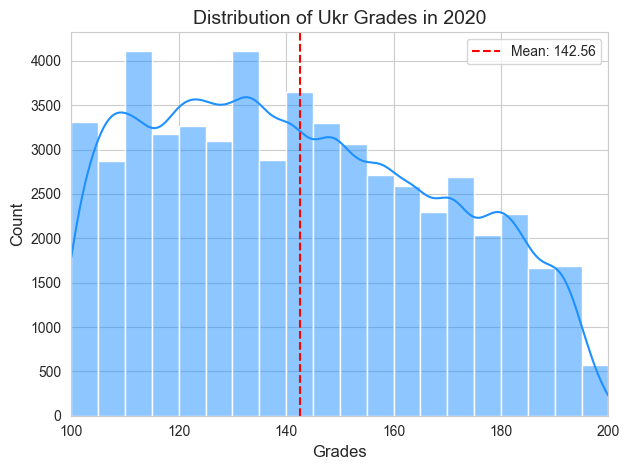

In [1421]:
ukr_df2020 = data[['TestType', 'Ukr']][data['TestType'] == 'ZNO2020']
ukr_df2020['Ukr'] = ukr_df2020['Ukr'].str.replace(',', '.').astype(float)
mean_ukr = ukr_df2020['Ukr'].mean()
ukr_df2020['Ukr'].fillna(mean_ukr, inplace=True)
ukr_df2020['Ukr'] = ukr_df2020['Ukr'].astype(int)
ukr_df2020 = ukr_df2020[ukr_df2020['Ukr'] != 0]
ukr_df2020['Ukr'].unique()
mean_value = ukr_df2020['Ukr'].mean()
sns.set_style("whitegrid")
bin_width = 5
sns.histplot(ukr_df2020['Ukr'], binwidth=bin_width, color="dodgerblue", kde=True)
mean_value = ukr_df2020['Ukr'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Ukr Grades in 2020', fontsize=14)
plt.legend(fontsize=10)
plt.xlim(100, 200)
plt.tight_layout()
plt.show()

### 2021

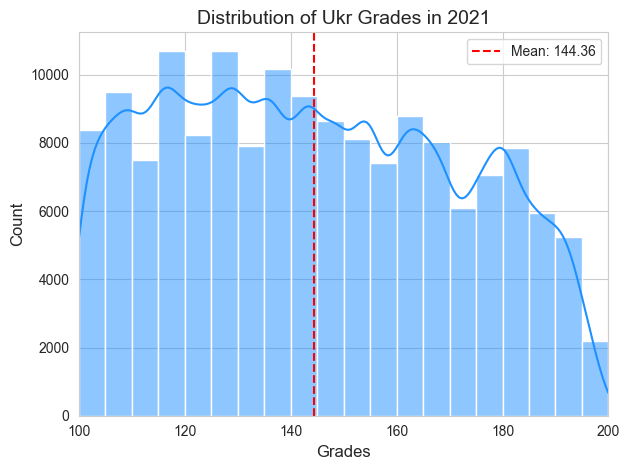

In [1422]:
ukr_df2021 = data[['TestType', 'Ukr', 'SchoolRegion']][(data['TestType'] == 'ZNO2021')]
ukr_df2021 = ukr_df2021.dropna(subset=['Ukr'])
ukr_df2021['Ukr'] = ukr_df2021['Ukr'].str.replace(',', '.').astype(float).astype(int)
ukr_df2021 = ukr_df2021[ukr_df2021['Ukr'] != 0]
sns.set_style("whitegrid")
bin_width = 5 
sns.histplot(ukr_df2021['Ukr'], binwidth=bin_width, color="dodgerblue", kde=True)
mean_value = ukr_df2021['Ukr'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Ukr Grades in 2021', fontsize=14)
plt.legend(fontsize=10)
plt.xlim(100, 200)
plt.tight_layout()
plt.show()

### 2022

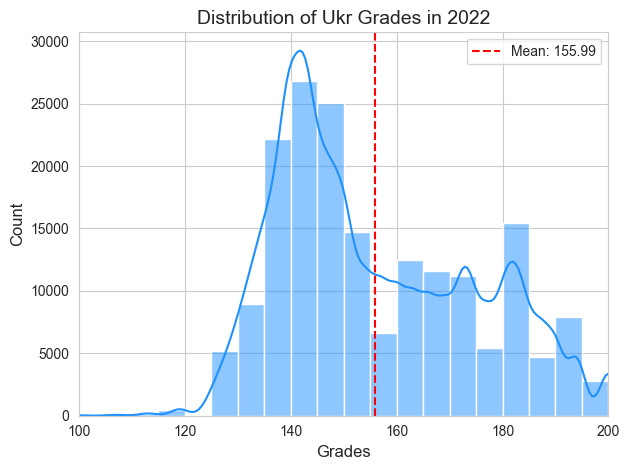

In [1423]:
ukr_df2022 = data[['TestType', 'Ukr', 'SchoolRegion']][(data['TestType'] == 'NMT2022')]
ukr_df2022 = ukr_df2022.dropna(subset=['Ukr'])
ukr_df2022 = ukr_df2022.dropna(subset=['SchoolRegion'])
ukr_df2022['Ukr'] = ukr_df2022['Ukr'].str.replace(',', '.').astype(float).astype(int)
ukr_df2022 = ukr_df2022[ukr_df2022['Ukr'] != 0]
sns.set_style("whitegrid")
bin_width = 5 
sns.histplot(ukr_df2022['Ukr'], binwidth=bin_width, color="dodgerblue", kde=True)
mean_value = ukr_df2022['Ukr'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Ukr Grades in 2022', fontsize=14)
plt.legend(fontsize=10)
plt.xlim(100, 200)
plt.tight_layout()
plt.show()

### 2023

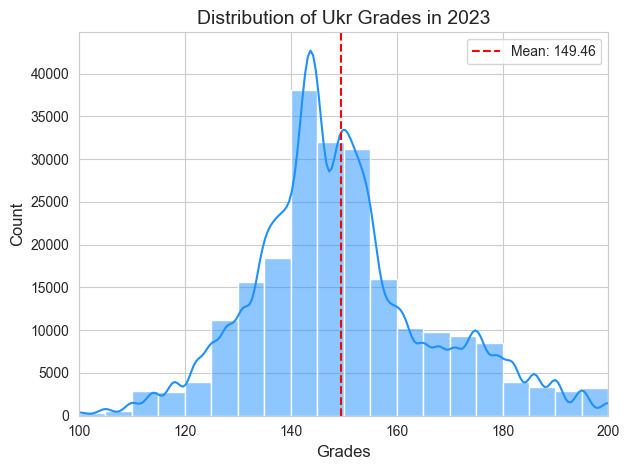

In [1424]:
ukr_df2023 = data[['TestType', 'Ukr', 'SchoolRegion']][(data['TestType'] == 'NMT2023')]
ukr_df2023 = ukr_df2023.dropna(subset=['Ukr'])
ukr_df2023 = ukr_df2023.dropna(subset=['SchoolRegion'])
ukr_df2023['Ukr'] = ukr_df2023['Ukr'].str.replace(',', '.').astype(float).astype(int)
ukr_df2023 = ukr_df2023[ukr_df2023['Ukr'] != 0]
sns.set_style("whitegrid")
bin_width = 5 
sns.histplot(ukr_df2023['Ukr'], binwidth=bin_width, color="dodgerblue", kde=True)
mean_value = ukr_df2023['Ukr'].mean()
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.xlabel('Grades', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Ukr Grades in 2023', fontsize=14)
plt.legend(fontsize=10)
plt.xlim(100, 200)
plt.tight_layout()
plt.show()

### Filter data

In [1425]:
df_cleaned = data.copy()

columns_to_filter = ['Ukr', 'Hist', 'Math', 'Phys', 'Chem', 'Bio', 'Eng', 'Fra', 'Deu', 'Spa']
for column in columns_to_filter:
    df_cleaned = df_cleaned[df_cleaned[column] != "0,0"]

columns_to_convert = ['Ukr', 'Hist', 'Math', 'Phys', 'Chem', 'Bio', 'Eng', 'Fra', 'Deu', 'Spa']
for column in columns_to_convert:
    df_cleaned[column] = df_cleaned[column].str.replace(',', '.').astype(float)
    mean_value = df_cleaned[column].mean()
    df_cleaned[column] = df_cleaned[column].fillna(mean_value).astype(int)

df_cleaned = df_cleaned.dropna(subset=['Urban'])
df_cleaned['Urban'] = df_cleaned['Urban'].astype(int)

region_groups = { 
    'Волинська область': 'Western Ukraine', 'Рівненська область': 'Western Ukraine', 'Львівська область': 'Western Ukraine',
    'Закарпатська область': 'Western Ukraine', 'Івано-Франківська область': 'Western Ukraine', 'Тернопільська область': 'Western Ukraine', 
    'Хмельницька область': 'Western Ukraine', 'Чернівецька область': 'Western Ukraine',

    'м.Київ': 'Central Ukraine', 'Київська область': 'Central Ukraine', 'Сумська область': 'Central Ukraine', 'Вінницька область': 'Central Ukraine',
    'Полтавська область': 'Central Ukraine', 'Житомирська область': 'Central Ukraine', 'Чернігівська область': 'Central Ukraine',
    'Черкаська область': 'Central Ukraine', 'Кіровоградська область': 'Central Ukraine',
    

    'Дніпропетровська область': 'Eastern Ukraine', 'Луганська область': 'Eastern Ukraine', 'Харківська область': 'Eastern Ukraine', 
    'Донецька область': 'Eastern Ukraine',

    'Запорізька область': 'Southern Ukraine', 'Херсонська область': 'Southern Ukraine',
    'Одеська область': 'Southern Ukraine', 'Миколаївська область': 'Southern Ukraine' 
}

df_cleaned['RegionGroup'] = df_cleaned['SchoolRegion'].map(region_groups)
region_dummies_geo = pd.get_dummies(df_cleaned['RegionGroup'], prefix='Is').astype(int)
df_cleaned = pd.concat([df_cleaned, region_dummies_geo], axis=1)

df_cleaned.rename(columns={
    'Is_Eastern Ukraine': 'Eastern',
    'Is_Southern Ukraine': 'Southern',
    'Is_Central Ukraine': 'Central',
    'Is_Western Ukraine': 'Western'
}, inplace=True)

df_cleaned['NMT'] = df_cleaned['TestType'].isin(['NMT2022', 'NMT2023']).astype(int)
df_cleaned['ZNO'] = df_cleaned['TestType'].isin(['ZNO2020', 'ZNO2021']).astype(int)
df_cleaned.columns

columns_to_drop = ['SchoolRegion', 'SchoolType', 'Hist', 'Phys', 'SchoolArea', 'Chem', 'Bio', 'Eng', 'Fra', 'Deu', 'Spa', 'RegionGroup']

df_cleaned.drop(columns=columns_to_drop, inplace=True)  

df_cleaned


,Birth,SexType,Ukr,Math,TestType,Urban,Central,Eastern,Southern,Western,NMT,ZNO
0,2002,0,165,124,ZNO2020,0,0,0,0,1,0,1
1,2003,1,159,145,ZNO2020,1,1,0,0,0,0,1
3,2003,1,162,145,ZNO2020,0,0,0,0,1,0,1
4,2002,0,192,192,ZNO2020,1,1,0,0,0,0,1
5,2002,1,154,141,ZNO2020,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
780645,2005,1,145,143,NMT2023,1,1,0,0,0,1,0
780646,2006,1,174,148,NMT2023,0,0,1,0,0,1,0
780648,2006,0,174,187,NMT2023,1,0,0,0,1,1,0
780649,2004,1,128,134,NMT2023,1,0,1,0,0,1,0


### interaction variables

In [1426]:
df_cleaned['SexType_NMT'] = df_cleaned['SexType'] * df_cleaned['NMT']
df_cleaned['Central_NMT'] = df_cleaned['Central'] * df_cleaned['NMT']
df_cleaned['Eastern_NMT'] = df_cleaned['Eastern'] * df_cleaned['NMT']
df_cleaned['Western_NMT'] = df_cleaned['Western'] * df_cleaned['NMT']

### OLS with interaction variables

In [1427]:
formula = 'Ukr ~ NMT + Birth + Math + Urban + SexType + SexType_NMT + Central + Central_NMT + Eastern + Eastern_NMT + Western + Western_NMT'
result = smf.ols(formula=formula, data=df_cleaned).fit()
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Ukr   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                 4.132e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:56:44   Log-Likelihood:            -2.4371e+06
No. Observations:              597599   AIC:                         4.874e+06
Df Residuals:                  597586   BIC:                         4.874e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -727.6169     38.297    -18.999      0.000    -802.677    -652.556
NMT            -4.0111      0.116    -34.582      0.000      -4.238      -3.784
Birth           0.4029      0.019     21.079      0.000       0.365       0.440
Math            0.5466      0.001    648.943      0.000       0.545       0.548
Urban           0.9353      0.043     21.597      0.000       0.850       1.020
SexType       -11.9119      0.064   -186.873      0.000     -12.037     -11.787
SexType_NMT     4.5638      0.078     58.295      0.000       4.410       4.717
Central         2.1917      0.098     22.437      0.000       2.000       2.383
Central_NMT    -0.6731      0.122     -5.502      0.000      -0.913      -0.433
Eastern         0.3069      0.109      2.816      0.005       0.093       0.521
Eastern_NMT    -0.2415      0.138     -1.753      0.080      -0.511       0.028
Western         3.4545      0.101     34.140      0.000       3.256       3.653
Western_NMT    -1.2654      0.126    -10.034      0.000      -1.513      -1.018
==============================================================================
Omnibus:                     1218.576   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1530.212
Skew:                           0.008   Prob(JB):                         0.00
Kurtosis:                       3.247   Cond. No.                     4.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption check for OLS model with interaction variables

perfect collinearity

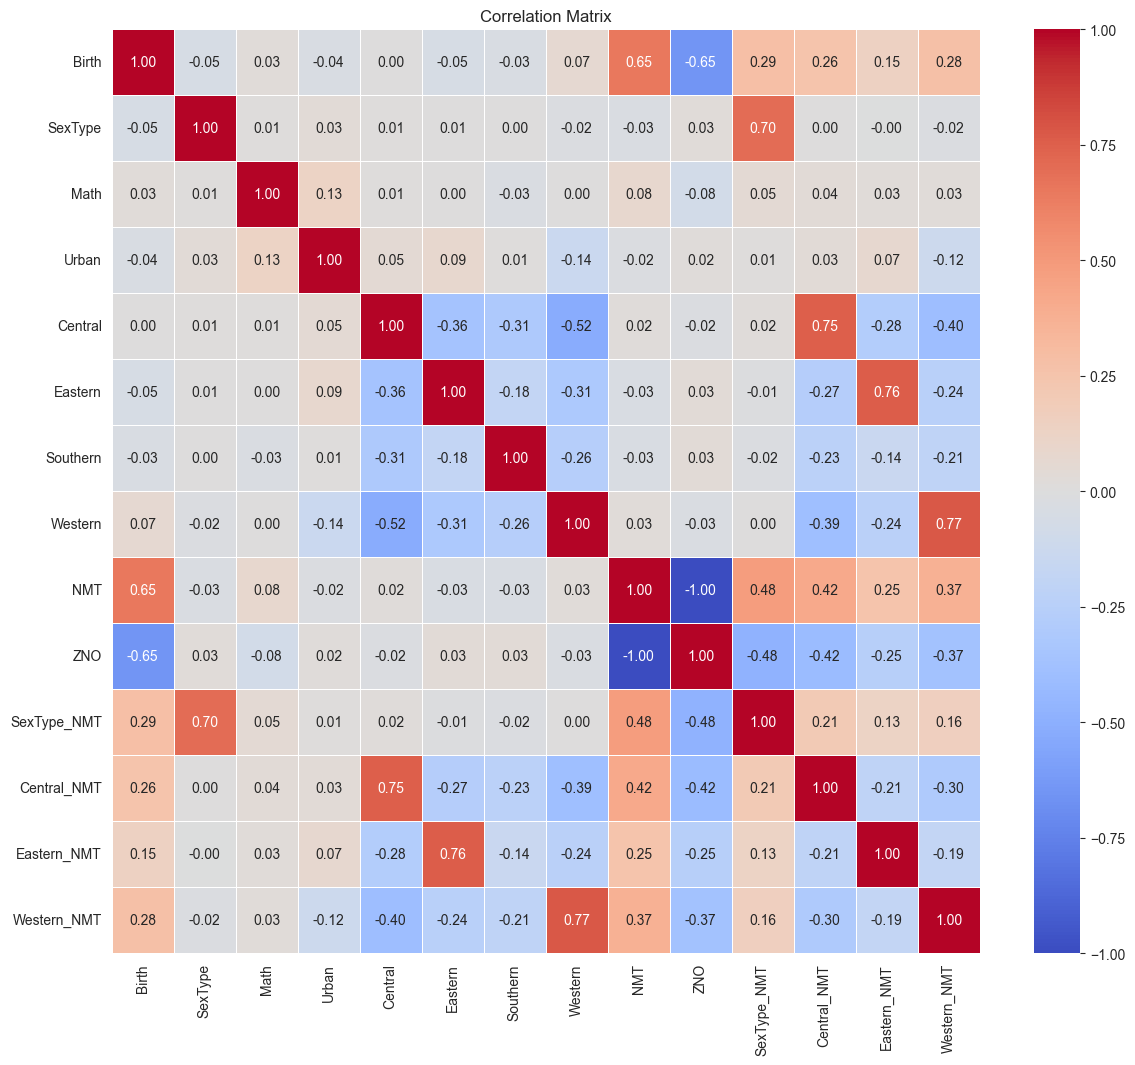

In [1429]:
columns_of_interest = [
    'Birth', 'SexType', 'Math', 'Urban', 'Central', 'Eastern', 'Southern', 'Western', 'NMT', 'ZNO', 'SexType_NMT', 'Central_NMT', 'Eastern_NMT', 'Western_NMT'
]

correlation_matrix = df_cleaned[columns_of_interest].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.4, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

error normality

In [1430]:
# statistical check
residuals2 = result.resid
from scipy import stats
jarque_bera_test = stats.jarque_bera(residuals2)
print("Jarque-Bera Test statistic:", jarque_bera_test.statistic)
print("Jarque-Bera Test p-value:", jarque_bera_test.pvalue)

Jarque-Bera Test statistic: 1530.2118814374103
Jarque-Bera Test p-value: 0.0


The Jarque-Bera test is very sensitive to large sample sizes. With a large number of observations, even small deviations from normality can result in a small p-value. 

The Q-Q plot indicated that the tails deviate slightly from the line. If the sample size is large, these deviations can lead to a significant Jarque-Bera test result, even if the overall distribution looks approximately normal.

Statistically, we may have enough evidence to say the residuals are not normal, but practically, if the deviation from normality is very slight (Q-Q plot that looks mostly normal), it may not have a meaningful impact on your analysis or model.

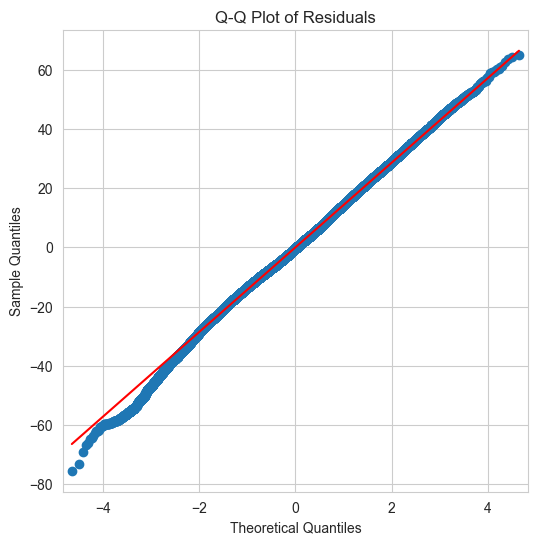

In [1431]:
# visuall check
did_model2 = smf.ols(formula=formula, data=df_cleaned).fit()
residuals = result.resid
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('Q-Q Plot of Residuals')
plt.show()

- central portion of the residuals is normally distributed
- tails seem to deviate slightly from the red line, especially the left tail, however, the deviation does not appear extreme
- don't appear to be significant outliers, as there are no points that are far away from the reference line or the general trend of the data

Q-Q plot shows that the residuals are mostly following a normal distribution, then the model may still be reliable, especially if the deviations are slight and occur only in the tails.

heteroscedasticity

With a very large sample size, the Breusch-Pagan test might detect even the smallest deviation from homoscedasticity, which might not be of practical significance.

In [1432]:
bp_test1 = sms.het_breuschpagan(result.resid, result.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test1)))

{'Lagrange multiplier statistic': 32450.139640929094, 'p-value': 0.0, 'f-value': 2859.3866306220634, 'f p-value': 0.0}


In [1433]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(result.resid, result.model.exog)
gq_test_statistic, gq_p_value = gq_test[:2]
print("Goldfeld-Quandt test p-value:", gq_p_value)

Goldfeld-Quandt test p-value: 0.9999999999999999


zero conditional mean (zero correlation with independent variables)

In [1434]:
import statsmodels.api as sm
residuals = result.resid
X = result.model.exog
X = sm.add_constant(X)
model_check = sm.OLS(residuals, X).fit()
display(model_check.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                -8.093e-10
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               1.00
Time:                        09:56:46   Log-Likelihood:            -2.4371e+06
No. Observations:              597599   AIC:                         4.874e+06
Df Residuals:                  597586   BIC:                         4.874e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.692e-08     38.297   9.64e-10      1.000     -75.061      75.061
x1         -3.784e-12      0.116  -3.26e-11      1.000      -0.227       0.227
x2         -1.829e-11      0.019  -9.57e-10      1.000      -0.037       0.037
x3          1.071e-13      0.001   1.27e-10      1.000      -0.002       0.002
x4         -2.333e-12      0.043  -5.39e-11      1.000      -0.085       0.085
x5         -6.787e-13      0.064  -1.06e-11      1.000      -0.125       0.125
x6          7.244e-12      0.078   9.25e-11      1.000      -0.153       0.153
x7         -7.631e-13      0.098  -7.81e-12      1.000      -0.191       0.191
x8         -3.477e-13      0.122  -2.84e-12      1.000      -0.240       0.240
x9          6.829e-14      0.109   6.27e-13      1.000      -0.214       0.214
x10         2.345e-13      0.138    1.7e-12      1.000      -0.270       0.270
x11         9.863e-12      0.101   9.75e-11      1.000      -0.198       0.198
x12        -9.621e-12      0.126  -7.63e-11      1.000      -0.247       0.247
==============================================================================
Omnibus:                     1218.576   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1530.212
Skew:                           0.008   Prob(JB):                         0.00
Kurtosis:                       3.247   Cond. No.                     4.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

serial correlation

In [1435]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(result.resid)
print('Durbin-Watson statistic:', dw)

Durbin-Watson statistic: 1.9535324812031711


A Durbin-Watson statistic close to 2 suggests no autocorrelation.

### Difference-in-differences

1. **Treatment group before the treatment**:  NMT kids with dummy after = 0 and treatment = 1

2. **Treatment group after the treatment**: NMT kids with dummy after = 1 and treatment = 1


3. **Control group before the treatment**: ZNO kids with dummy after = 0 and treatment = 0

4. **Control group after the treatment**: ZNO kids with dummy after = 1 and treatment = 0

In [1436]:
df_for_did = df_cleaned.copy()
columns_to_drop = ['NMT', 'ZNO', 'SexType_NMT', 'Central_NMT', 'Eastern_NMT', 'Western_NMT']
df_for_did.drop(columns=columns_to_drop, inplace=True)  
df_for_did

,Birth,SexType,Ukr,Math,TestType,Urban,Central,Eastern,Southern,Western
0,2002,0,165,124,ZNO2020,0,0,0,0,1
1,2003,1,159,145,ZNO2020,1,1,0,0,0
3,2003,1,162,145,ZNO2020,0,0,0,0,1
4,2002,0,192,192,ZNO2020,1,1,0,0,0
5,2002,1,154,141,ZNO2020,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
780645,2005,1,145,143,NMT2023,1,1,0,0,0
780646,2006,1,174,148,NMT2023,0,0,1,0,0
780648,2006,0,174,187,NMT2023,1,0,0,0,1
780649,2004,1,128,134,NMT2023,1,0,1,0,0


### Synthetically duplicated data 

In [1437]:
df_for_did['Treatment'] = 1
df_for_did['After'] = df_for_did['TestType'].apply(lambda x: 0 if 'ZNO' in x else 1)

In [1438]:
def calculate_sample_size(population_size, margin_error=0.05, confidence_level=0.95, std_dev=0.5):
    z_score = {0.95: 1.96, 0.99: 2.576}[confidence_level]
    part1 = (z_score**2) * (std_dev * (1 - std_dev))
    part2 = (margin_error**2) * (population_size - 1) + (z_score**2) * (std_dev * (1 - std_dev))
    sample_size = (population_size * part1) / part2
    return int(math.ceil(sample_size))

In [1439]:
required_sample_size_2020 = calculate_sample_size(len(df_for_did[df_for_did['TestType'] == 'ZNO2020']), 0.05, 0.95, 0.5)
required_sample_size_2021 = calculate_sample_size(len(df_for_did[df_for_did['TestType'] == 'ZNO2021']), 0.05, 0.95, 0.5)
df_for_did['Randomly_sampled'] = 0

sample_before_2020 = df_for_did[df_for_did['TestType'] == 'ZNO2020'].sample(required_sample_size_2020)
sample_before_2020['After'] = 0
sample_before_2020['Treatment'] = 0
sample_before_2020['Randomly_sampled'] = 1
sample_before_2021 = df_for_did[df_for_did['TestType'] == 'ZNO2021'].sample(required_sample_size_2021)
sample_before_2021['After'] = 0
sample_before_2021['Treatment'] = 0
sample_before_2021['Randomly_sampled'] = 1

sample_after_2020 = df_for_did[df_for_did['TestType'] == 'ZNO2020'].sample(required_sample_size_2020)
sample_after_2020['After'] = 1
sample_after_2020['Treatment'] = 0
sample_after_2020['Randomly_sampled'] = 1

sample_after_2021 = df_for_did[df_for_did['TestType'] == 'ZNO2021'].sample(required_sample_size_2021)
sample_after_2021['After'] = 1
sample_after_2021['Treatment'] = 0
sample_after_2021['Randomly_sampled'] = 1

In [1440]:
df_for_did = pd.concat([df_for_did, sample_before_2020, sample_before_2021, sample_after_2020, sample_after_2021], axis=0)
df_for_did

,Birth,SexType,Ukr,Math,TestType,Urban,Central,Eastern,Southern,Western,Treatment,After,Randomly_sampled
0,2002,0,165,124,ZNO2020,0,0,0,0,1,1,0,0
1,2003,1,159,145,ZNO2020,1,1,0,0,0,1,0,0
3,2003,1,162,145,ZNO2020,0,0,0,0,1,1,0,0
4,2002,0,192,192,ZNO2020,1,1,0,0,0,1,0,0
5,2002,1,154,141,ZNO2020,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248286,2004,1,151,188,ZNO2021,0,0,0,0,1,0,1,1
245436,2004,0,133,140,ZNO2021,1,0,1,0,0,0,1,1
147486,2004,1,151,113,ZNO2021,1,1,0,0,0,0,1,1
297353,2004,1,132,167,ZNO2021,1,0,0,1,0,0,1,1


In [1443]:
quantity_per_group = df_for_did.groupby(['TestType', 'Randomly_sampled', 'Treatment', 'After']).size().reset_index(name='Quantity')

unique_combinations = df_for_did[['TestType', 'Randomly_sampled', 'Treatment', 'After']].drop_duplicates()

unique_combinations_with_quantity = unique_combinations.merge(quantity_per_group, on=['TestType', 'Randomly_sampled', 'Treatment', 'After'], how='left')

unique_combinations_with_quantity

,TestType,Randomly_sampled,Treatment,After,Quantity
0,ZNO2020,0,1,0,43193
1,ZNO2021,0,1,0,157987
2,NMT2022,0,1,1,181652
3,NMT2023,0,1,1,214767
4,ZNO2020,1,0,0,381
5,ZNO2021,1,0,0,384
6,ZNO2020,1,0,1,381
7,ZNO2021,1,0,1,384


### Difference-in-differences model

In [1444]:
model1 = 'Ukr ~ Treatment * After * SexType + Math + SexType + Birth + Urban + Eastern + Western + Central'
result1 = smf.ols(formula=model1, data=df_for_did).fit()
display(result1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Ukr   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                 3.821e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:56:47   Log-Likelihood:            -2.4438e+06
No. Observations:              599129   AIC:                         4.888e+06
Df Residuals:                  599115   BIC:                         4.888e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -729.1887     38.284    -19.047      0.000    -804.225    -654.152
Treatment                  -0.0555      0.725     -0.077      0.939      -1.477       1.366
After                       0.9674      1.021      0.947      0.343      -1.034       2.969
Treatment:After            -5.6613      1.023     -5.533      0.000      -7.667      -3.656
SexType                   -12.6834      1.034    -12.267      0.000     -14.710     -10.657
Treatment:SexType           0.7626      1.036      0.736      0.462      -1.268       2.793
After:SexType              -1.1860      1.462     -0.811      0.417      -4.052       1.680
Treatment:After:SexType     5.7617      1.465      3.934      0.000       2.891       8.632
Math                        0.5466      0.001    649.520      0.000       0.545       0.548
Birth                       0.4039      0.019     21.140      0.000       0.366       0.441
Urban                       0.9379      0.043     21.675      0.000       0.853       1.023
Eastern                     0.1633      0.067      2.449      0.014       0.033       0.294
Western                     2.6373      0.061     43.537      0.000       2.519       2.756
Central                     1.7788      0.059     30.269      0.000       1.664       1.894
==============================================================================
Omnibus:                     1194.977   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1496.942
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                       3.244   Cond. No.                     4.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption check for DiD

perfect collinearity

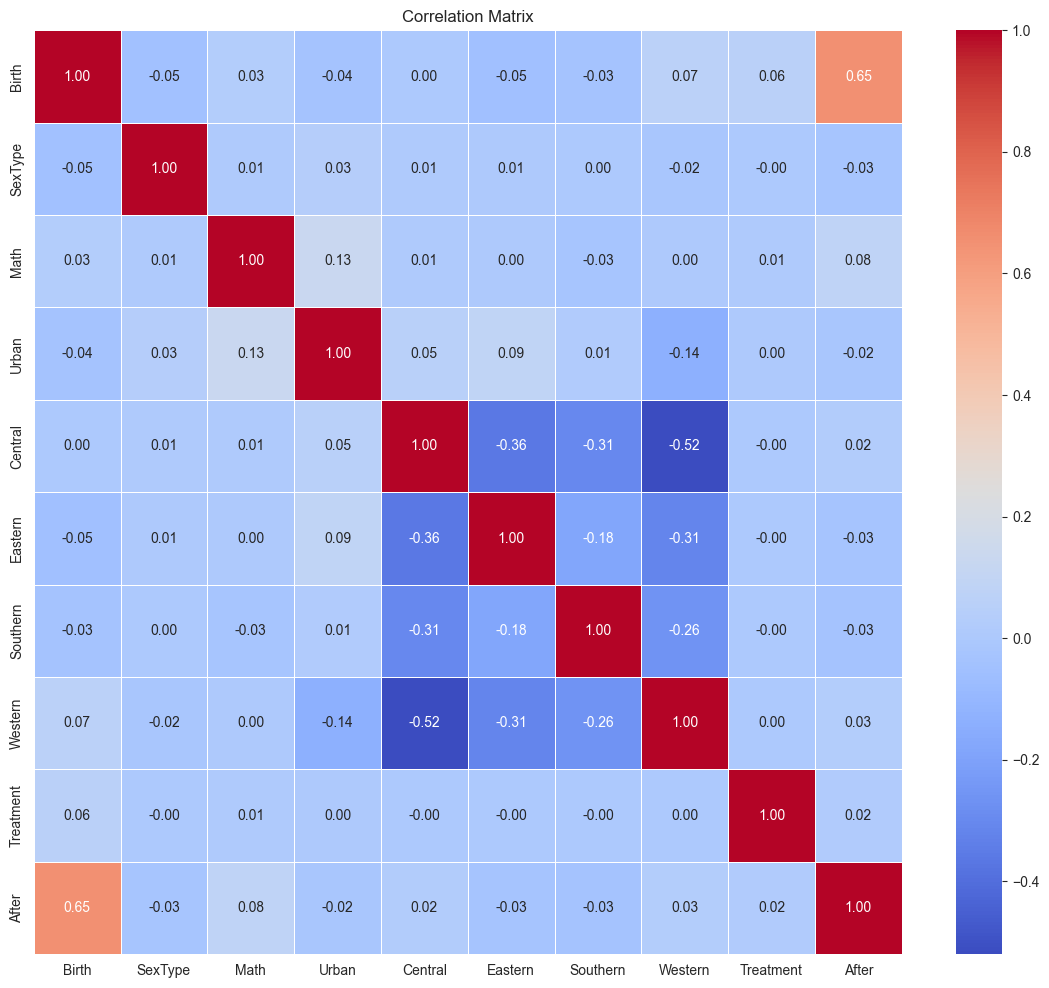

In [1446]:
columns_of_interest = [
    'Birth', 'SexType', 'Math', 'Urban', 'Central', 'Eastern', 'Southern', 'Western', 'Treatment', 'After'
]

correlation_matrix = df_for_did[columns_of_interest].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.4, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

error normality

In [1447]:
# statistical check
residuals = result1.resid
from scipy import stats
jarque_bera_test = stats.jarque_bera(residuals)
print("Jarque-Bera Test statistic:", jarque_bera_test.statistic)
print("Jarque-Bera Test p-value:", jarque_bera_test.pvalue)

Jarque-Bera Test statistic: 1496.941913010575
Jarque-Bera Test p-value: 0.0


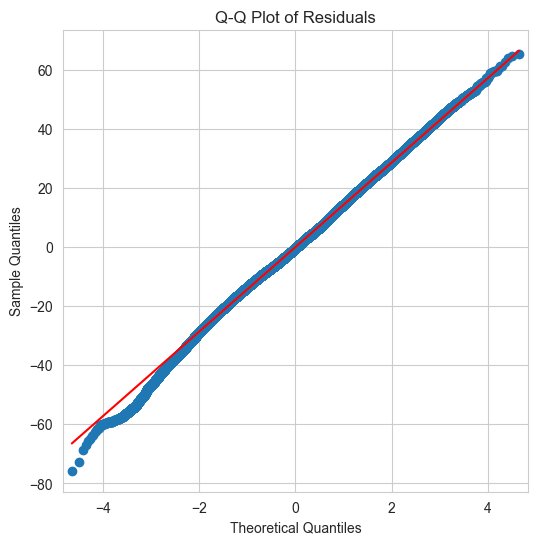

In [1448]:
# visuall check
did_model2 = smf.ols(formula=model1, data=df_for_did).fit()
residuals = result1.resid
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('Q-Q Plot of Residuals')
plt.show()

heteroscedasticity

In [1449]:
bp_test1 = sms.het_breuschpagan(result1.resid, result1.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test1)))

{'Lagrange multiplier statistic': 32579.448730935914, 'p-value': 0.0, 'f-value': 2650.1635250021163, 'f p-value': 0.0}


In [1450]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(result1.resid, result1.model.exog)
gq_test_statistic, gq_p_value = gq_test[:2]
print("Goldfeld-Quandt test p-value:", gq_p_value)

Goldfeld-Quandt test p-value: 0.9999999999999999


zero conditional mean

In [1451]:
import statsmodels.api as sm
residuals = result1.resid
X = result1.model.exog
X = sm.add_constant(X)
model_check = sm.OLS(residuals, X).fit()
display(model_check.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                -7.740e-10
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               1.00
Time:                        09:56:49   Log-Likelihood:            -2.4438e+06
No. Observations:              599129   AIC:                         4.888e+06
Df Residuals:                  599115   BIC:                         4.888e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.061e-08     38.284   2.77e-10      1.000     -75.036      75.036
x1          3.007e-10      0.725   4.15e-10      1.000      -1.422       1.422
x2           3.54e-10      1.021   3.47e-10      1.000      -2.001       2.001
x3          -2.52e-10      1.023  -2.46e-10      1.000      -2.005       2.005
x4         -4.202e-11      1.034  -4.06e-11      1.000      -2.027       2.027
x5          4.732e-12      1.036   4.57e-12      1.000      -2.030       2.030
x6         -1.167e-11      1.462  -7.98e-12      1.000      -2.866       2.866
x7          5.114e-12      1.465   3.49e-12      1.000      -2.870       2.870
x8         -3.067e-13      0.001  -3.64e-10      1.000      -0.002       0.002
x9         -6.021e-12      0.019  -3.15e-10      1.000      -0.037       0.037
x10         2.886e-12      0.043   6.67e-11      1.000      -0.085       0.085
x11        -3.205e-13      0.067  -4.81e-12      1.000      -0.131       0.131
x12        -3.471e-12      0.061  -5.73e-11      1.000      -0.119       0.119
x13        -1.683e-13      0.059  -2.86e-12      1.000      -0.115       0.115
==============================================================================
Omnibus:                     1194.977   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1496.942
Skew:                           0.007   Prob(JB):                         0.00
Kurtosis:                       3.244   Cond. No.                     4.17e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

serial correlation

In [1452]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(result1.resid)
print('Durbin-Watson statistic:', dw)

Durbin-Watson statistic: 1.953941354110383
